#Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataAssurance.csv to dataAssurance (1).csv


In [ ]:
df = pd.read_csv('dataAssurance.csv')

#Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1406 non-null   float64
 1   sex       1405 non-null   object 
 2   bmi       1410 non-null   float64
 3   children  1414 non-null   float64
 4   smoker    1417 non-null   object 
 5   region    1410 non-null   object 
 6   charges   1414 non-null   float64
dtypes: float64(4), object(3)
memory usage: 79.0+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
df.shape

(1443, 7)

In [ ]:
df.isnull().sum()

,0
age,37
sex,38
bmi,33
children,29
smoker,26
region,33
charges,29


In [ ]:
df.duplicated().sum()

np.int64(105)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1406.000000,1410.000000,1414.000000,1414.000000
mean,39.179232,30.637681,1.086280,13179.307173
std,14.067120,6.112450,1.196088,11987.371506
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4748.057175
50%,39.000000,30.302500,1.000000,9369.615750
75%,51.000000,34.656250,2.000000,16547.261588
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1405,1417,1410
unique,2,2,4
top,male,no,southeast
freq,719,1132,381


In [ ]:
df = df.drop_duplicates()

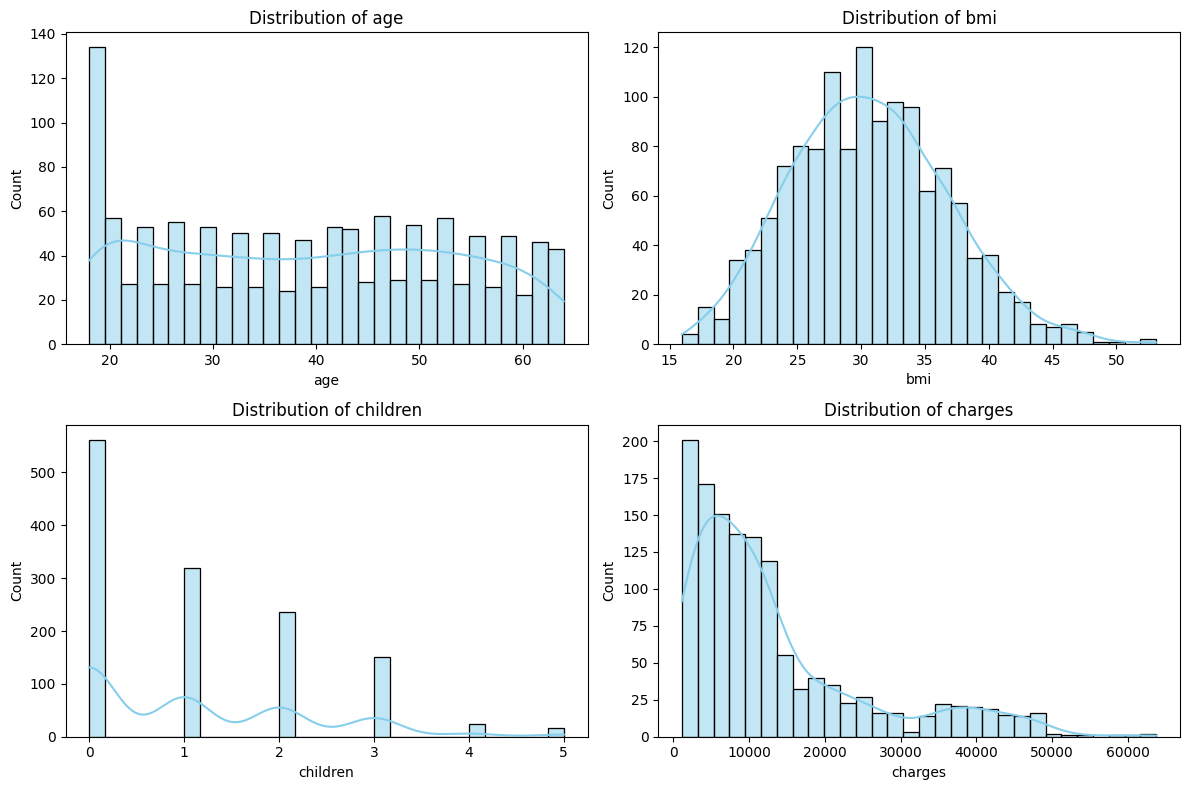

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


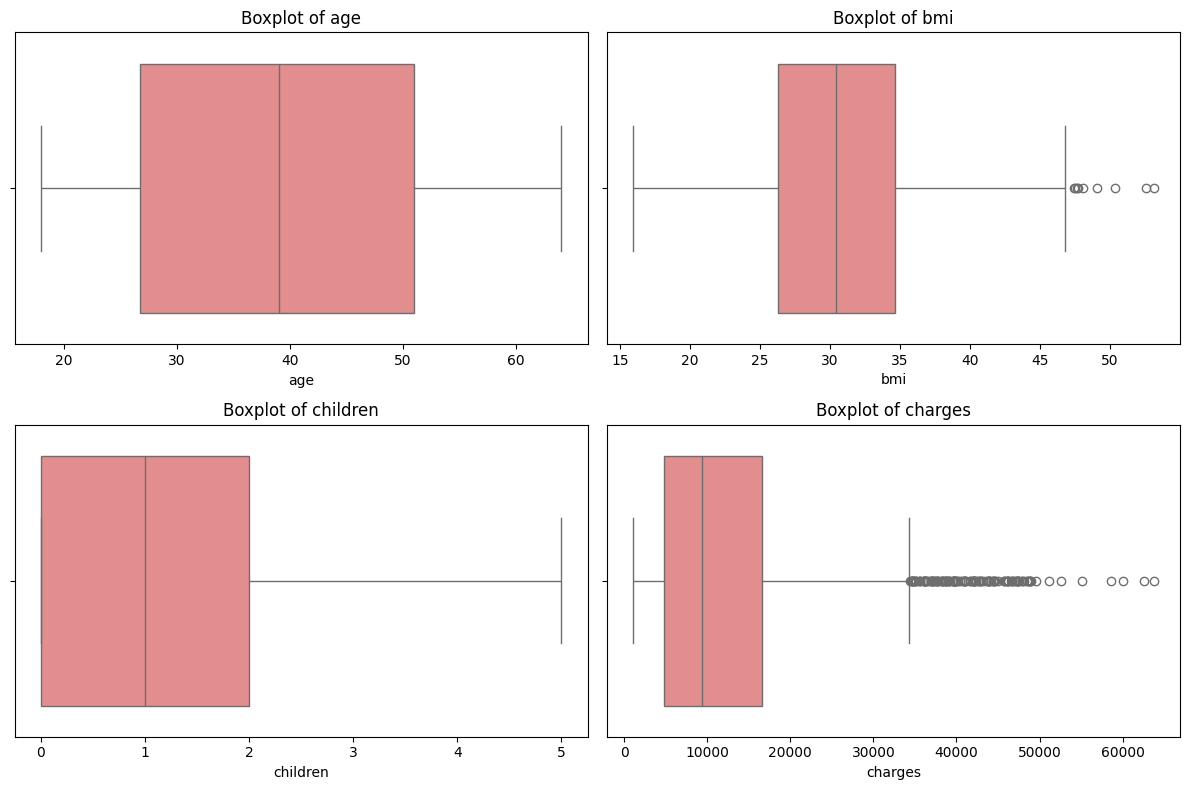

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2682332774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")
/tmp/ipython-input-2682332774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")
/tmp/ipython-input-2682332774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


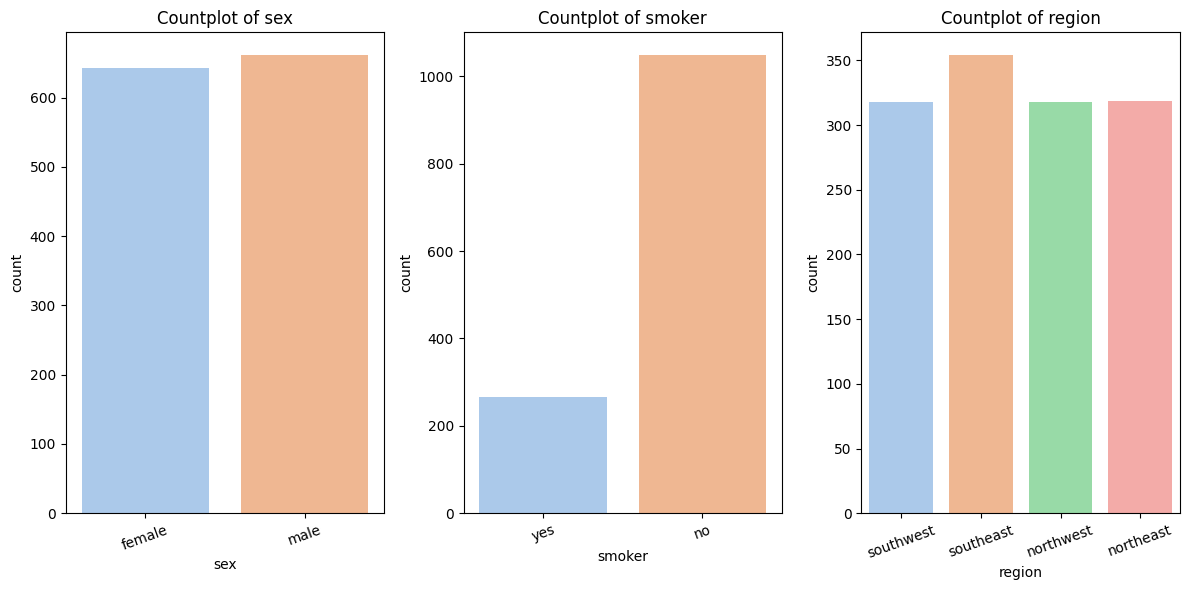

In [ ]:
cat_cols = ["sex", "smoker", "region"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


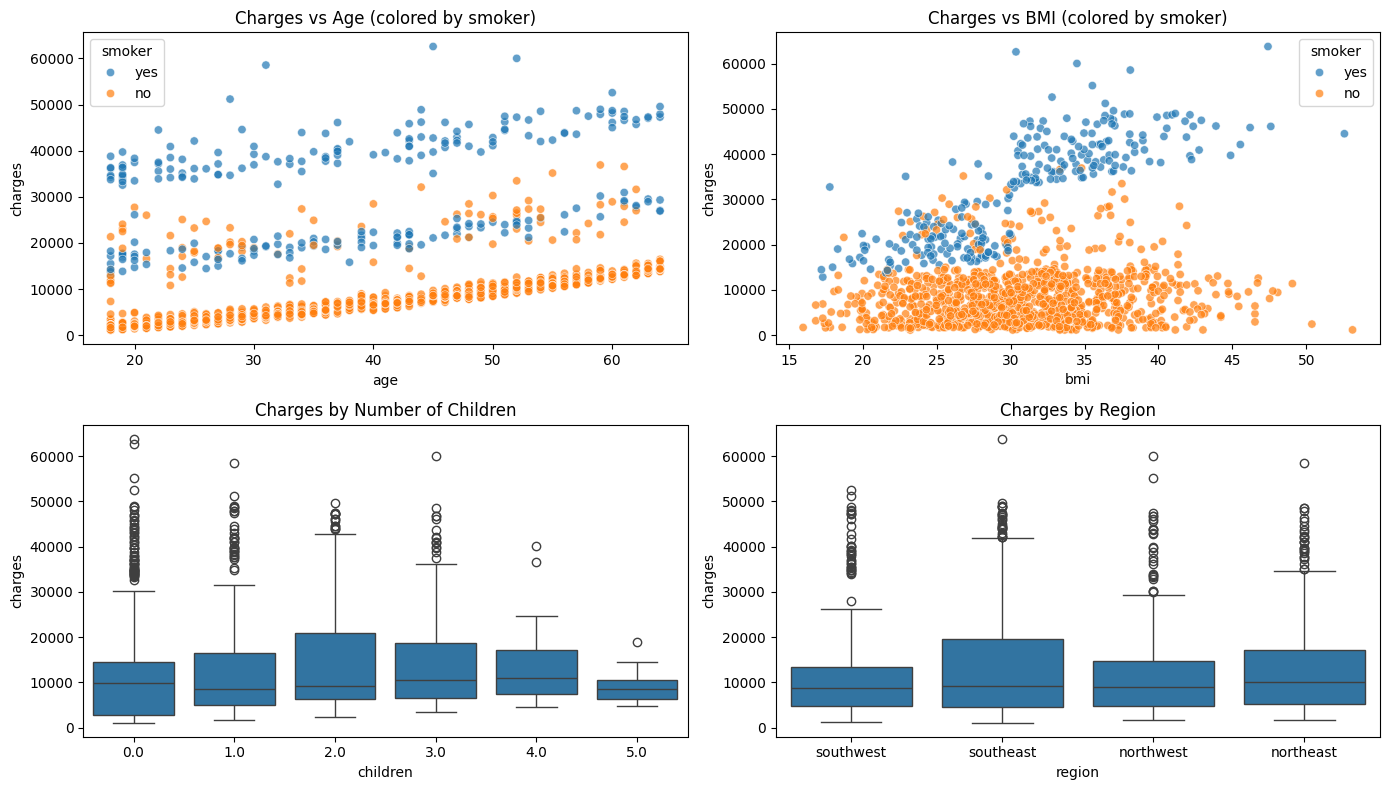

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x="age", y="charges", data=df, hue="smoker", alpha=0.7)
plt.title("Charges vs Age (colored by smoker)")

plt.subplot(2, 2, 2)
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", alpha=0.7)
plt.title("Charges vs BMI (colored by smoker)")

plt.subplot(2, 2, 3)
sns.boxplot(x="children", y="charges", data=df)
plt.title("Charges by Number of Children")

plt.subplot(2, 2, 4)
sns.boxplot(x="region", y="charges", data=df)
plt.title("Charges by Region")

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

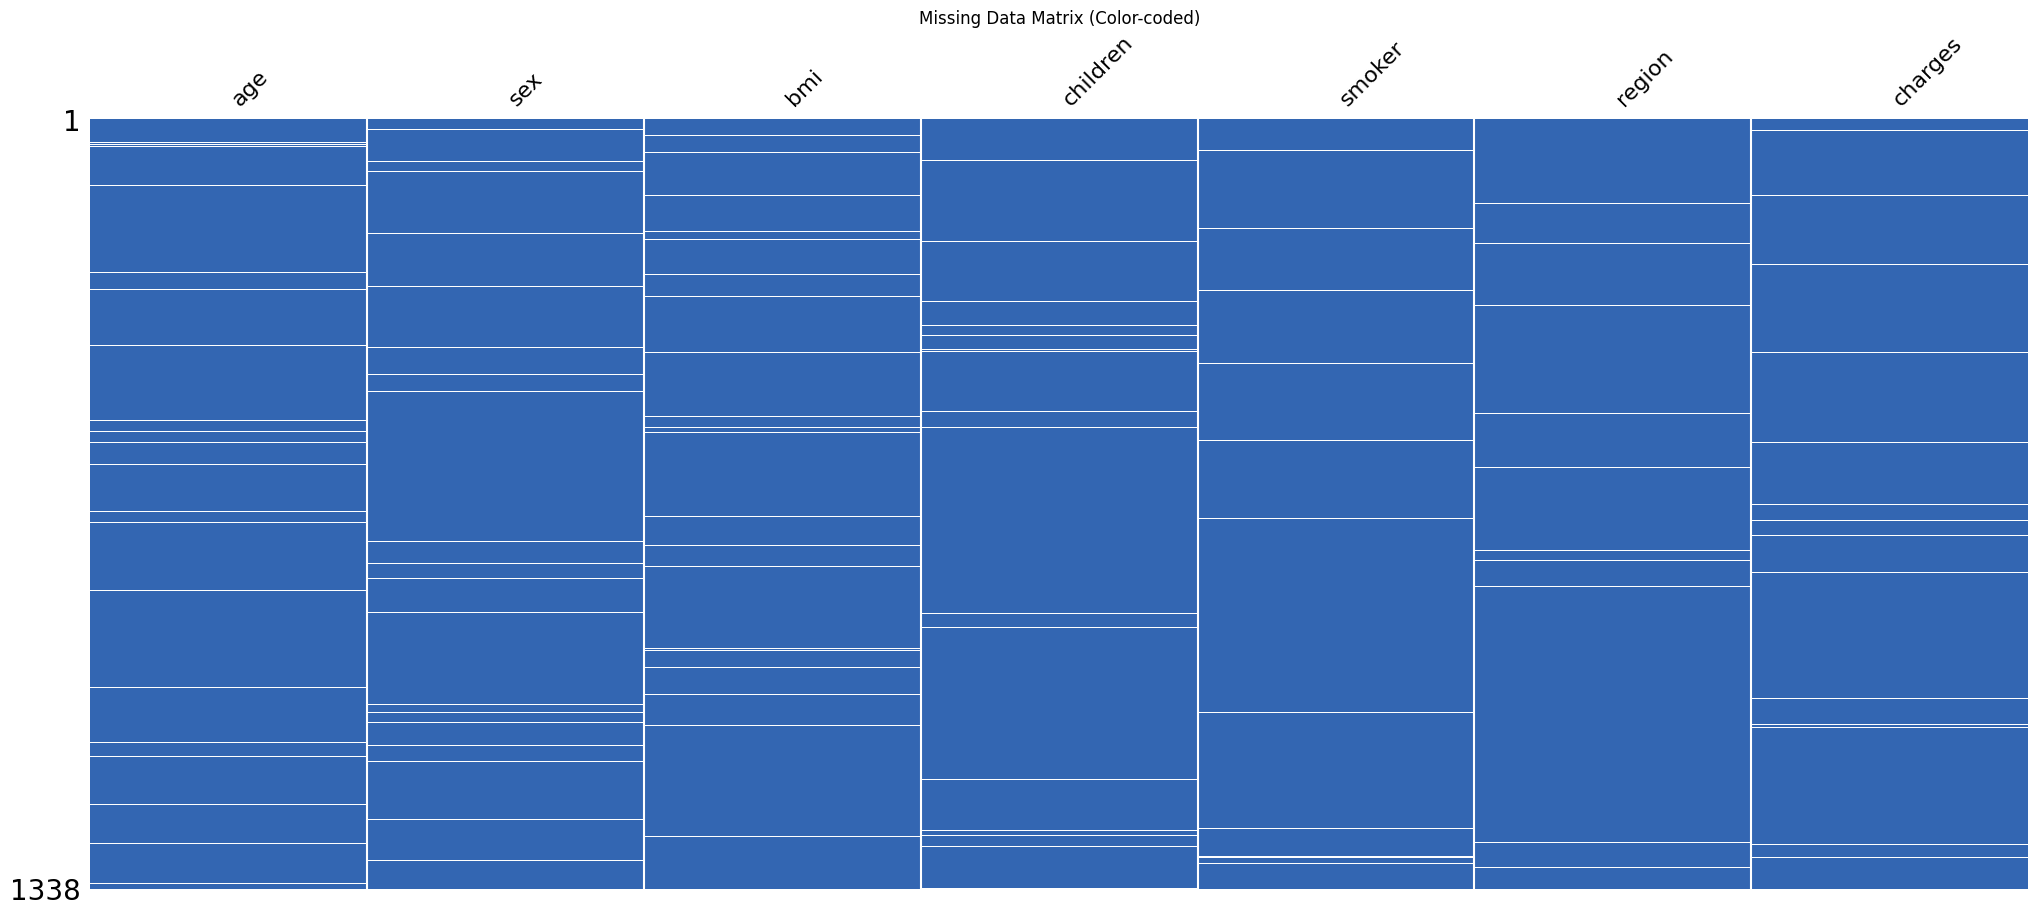

In [ ]:
import missingno as msno

plt.figure(figsize=(10, 5))
msno.matrix(df, color=(0.2, 0.4, 0.7), sparkline=False)
plt.title("Missing Data Matrix (Color-coded)")
plt.show()

# Imputation

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer

# Encode categoricals
for col in ['sex', 'smoker', 'region']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Scale numeric columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df.columns)


In [ ]:
numeric_cols = ['age', 'bmi', 'children', 'charges']

# Apply only on numeric columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,2,4,16884.92400
1,18.0,1,33.770,1.0,1,3,1725.55230
2,28.0,1,33.000,3.0,1,3,4449.46200
3,33.0,1,22.705,0.0,1,2,21984.47061
4,32.0,1,28.880,0.0,1,2,3866.85520


#Outlier Detection

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Q1 = {Q1:.3f}, Q3 = {Q3:.3f}, IQR = {IQR:.3f}")
    print(f"Lower bound = {lower_bound:.3f}, Upper bound = {upper_bound:.3f}")
    print(f"Outliers detected: {outliers.shape[0]}")
    return outliers


In [ ]:
numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    detect_outliers_iqr(df, col)


Column: age
Q1 = 27.000, Q3 = 51.000, IQR = 24.000
Lower bound = -9.000, Upper bound = 87.000
Outliers detected: 0
Column: bmi
Q1 = 26.400, Q3 = 34.430, IQR = 8.030
Lower bound = 14.355, Upper bound = 46.475
Outliers detected: 14
Column: children
Q1 = 0.000, Q3 = 2.000, IQR = 2.000
Lower bound = -3.000, Upper bound = 5.000
Outliers detected: 0
Column: charges
Q1 = 4803.719, Q3 = 16547.262, IQR = 11743.543
Lower bound = -12811.595, Upper bound = 34162.576
Outliers detected: 140


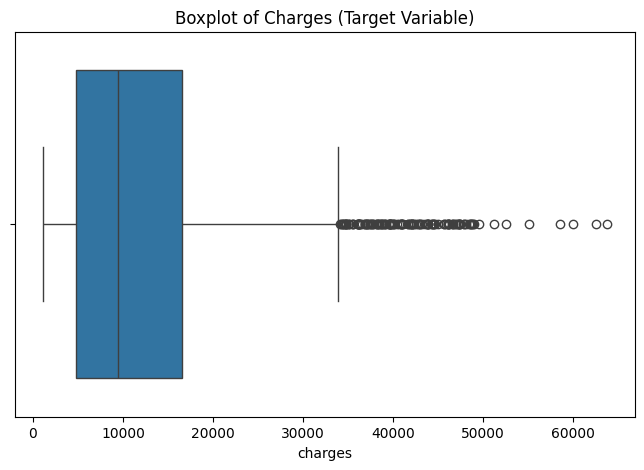

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["charges"])
plt.title("Boxplot of Charges (Target Variable)")
plt.show()

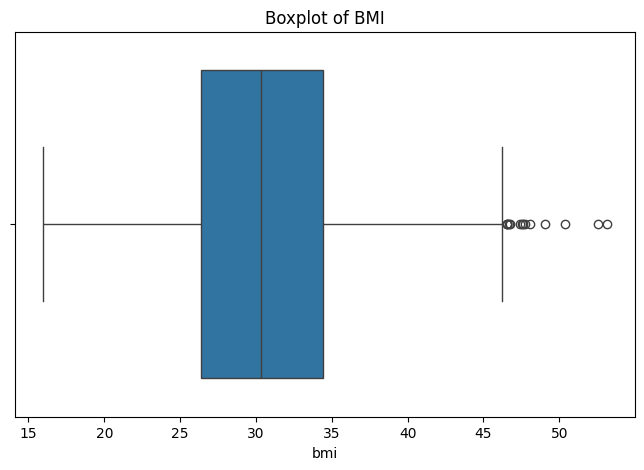

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["bmi"])
plt.title("Boxplot of BMI")
plt.show()

# Split Features and Target

In [ ]:
# Separate target and features
X = df.drop(columns=["charges"])
y = df["charges"]

In [ ]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(X.head())
print(y.head())

Features shape: (1338, 6)
Target shape: (1338,)
    age  sex     bmi  children  smoker  region
0  19.0    0  27.900       0.0       2       4
1  18.0    1  33.770       1.0       1       3
2  28.0    1  33.000       3.0       1       3
3  33.0    1  22.705       0.0       1       2
4  32.0    1  28.880       0.0       1       2
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


# Split Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (1070, 6)
Test set size: (268, 6)


/tmp/ipython-input-124938860.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label="Train", shade=True)
/tmp/ipython-input-124938860.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Test", shade=True)


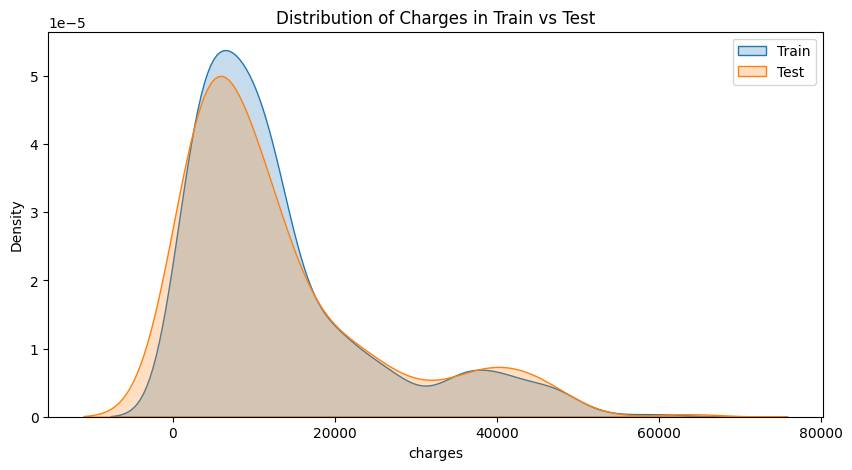

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.kdeplot(y_train, label="Train", shade=True)
sns.kdeplot(y_test, label="Test", shade=True)
plt.title("Distribution of Charges in Train vs Test")
plt.legend()
plt.show()

# Linear Regression Model

In [ ]:
#helpers for scaling and encoding before modeling

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Combine preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4521.99
RMSE: 6361.79
R² Score: 0.74


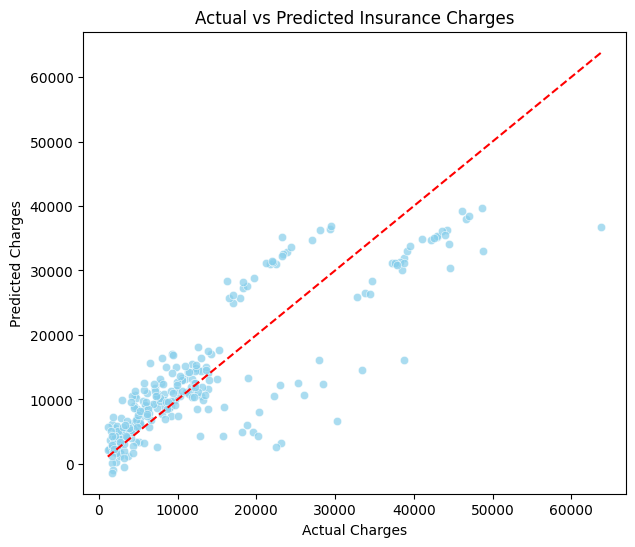

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color="skyblue", alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Interpretation
Using the Linear Regression Model did not give us accurate predictions based on the error metrics and visuals, the average prediction error is around $4,500 to $6,000 per person

# Random Forest Model



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    random_state=42,       # for reproducibility
    max_depth=None,        # let trees grow fully (you can tune this)
    min_samples_split=2,   # minimum samples to split a node
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3180.27
RMSE: 5715.33
R² Score: 0.79


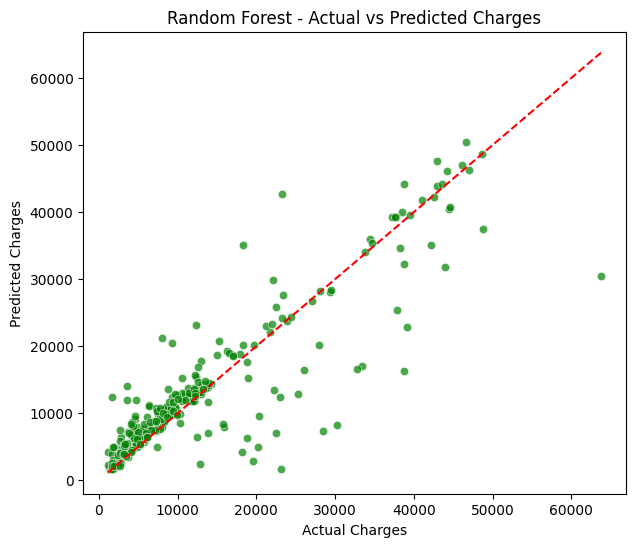

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color="green", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest - Actual vs Predicted Charges")
plt.show()

##Interpretation
This model operates better with an R2 higher by 0.05 and we're almost 1,000$ more accurate on the results, our theory is that the imputation may have impacted the dataset so the model is kind of trained on imaginary data

# Gradient Boosting Regressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3141.62
RMSE: 5553.44
R² Score: 0.80


In [ ]:
r2_train = gbr.score(X_train, y_train)
r2_test = gbr.score(X_test, y_test)

print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")

Train R²: 0.91
Test R²: 0.80


This model showed the best results but since the training r2 and testing r2 have a 0.11 gap and kind of high then we may be falling into a slight overfitting

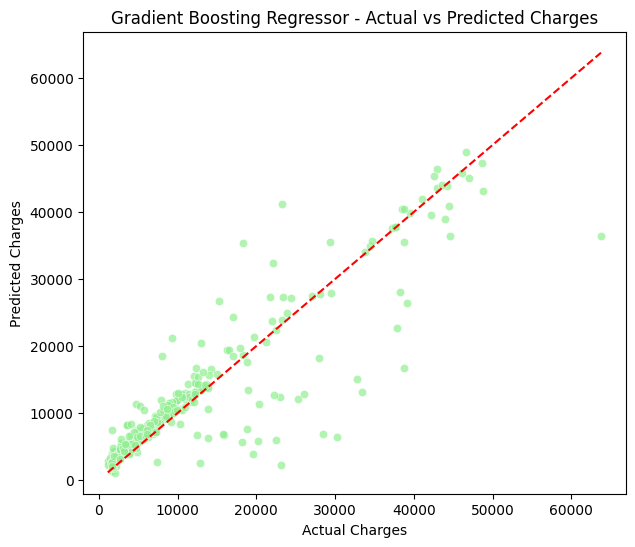

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_gbr, color="lightgreen", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Gradient Boosting Regressor - Actual vs Predicted Charges")
plt.show()

# Extreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3508.44
RMSE: 5960.17
R² Score: 0.77


In [ ]:
r2_train = xgb.score(X_train, y_train)
r2_test = xgb.score(X_test, y_test)

print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")

Train R²: 0.97
Test R²: 0.77


This model is obviously overfitting 😒

#Overall
The best performing model is Gradient Boosting Regression Model with 0.8 R2 score, the imputation done with KNN may have impacted the models' performances